# End2End Code

Projet simple de machine learning avec régression linéaire utilisant le dataset Boston Housing

## 1. Import des bibliothèques

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pour le préprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Pour les modèles
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

# Pour l'évaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# pour les données
from sklearn.datasets import fetch_california_housing


## 2. Collecte des données (California Housing dataset)

In [37]:
print("Chargement des données...")
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['PRICE'] = housing.target

Chargement des données...


In [38]:
# Affichage des premières lignes pour vérification
print("Aperçu des données:")
print(df.head())

Aperçu des données:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  PRICE  
0    -122.23  4.526  
1    -122.22  3.585  
2    -122.24  3.521  
3    -122.25  3.413  
4    -122.25  3.422  


## 3. Analyse exploratoire des données

In [39]:
print("\nInformations sur les données:")
print(df.info())


Informations sur les données:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   PRICE       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [40]:
print("\nStatistiques descriptives:")
print(df.describe())


Statistiques descriptives:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         PRICE  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min 

Text(0.5, 1.0, 'Distribution des prix des maisons en Californie')

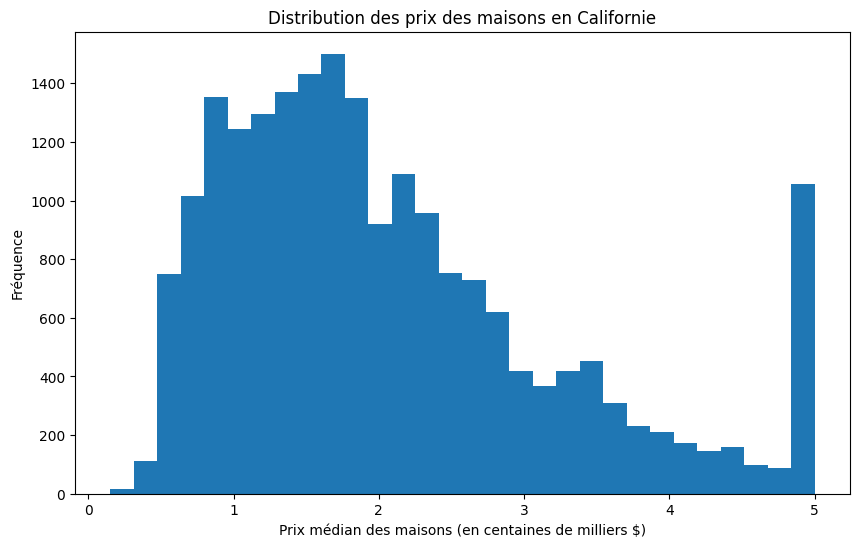

In [41]:
# Visualisation de la distribution de la variable cible
plt.figure(figsize=(10, 6))
plt.hist(df['PRICE'], bins=30)
plt.xlabel('Prix médian des maisons (en centaines de milliers $)')
plt.ylabel('Fréquence')
plt.title('Distribution des prix des maisons en Californie')
#plt.savefig('prix_distribution.png')
#plt.close()

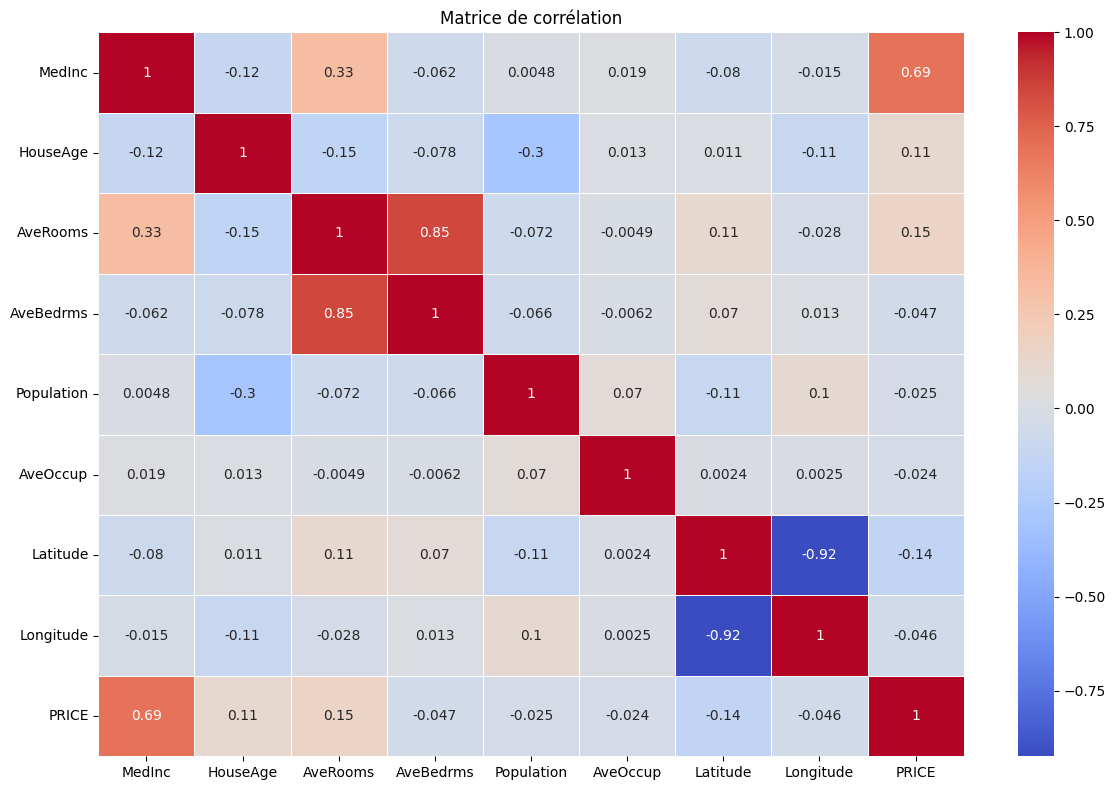

In [42]:
# Matrice de corrélation pour voir les relations entre les variables
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.tight_layout()
#plt.savefig('correlation_matrix.png')
#plt.close()

## 4. Séparation des features (X) et de la cible (y)

In [43]:
print("\nSéparation des variables explicatives et de la cible...")
X = df.drop('PRICE', axis=1)
y = df['PRICE']


Séparation des variables explicatives et de la cible...


## 4. Ajout artificiel de quelques valeurs manquantes pour démontrer l'imputation

In [44]:
# Ajout artificiel de quelques valeurs manquantes pour démontrer l'imputation
print("\nAjout de quelques valeurs manquantes pour démonstration...")
np.random.seed(42)
mask = np.random.rand(*X.shape) < 0.05  # 5% de valeurs manquantes
X_with_missing = X.mask(mask)

print("\nNombre de valeurs manquantes par colonne:")
print(X_with_missing.isnull().sum())


Ajout de quelques valeurs manquantes pour démonstration...

Nombre de valeurs manquantes par colonne:
MedInc        1008
HouseAge      1001
AveRooms      1047
AveBedrms     1042
Population    1001
AveOccup       986
Latitude       997
Longitude     1058
dtype: int64


## 6. Division en ensembles d'entraînement et de test


In [45]:
print("\nDivision en ensembles d'entraînement et de test...")
X_train, X_test, y_train, y_test = train_test_split(X_with_missing, y, test_size=0.2, random_state=42)

print(f"Taille de l'ensemble d'entraînement: {X_train.shape}")
print(f"Taille de l'ensemble de test: {X_test.shape}")


Division en ensembles d'entraînement et de test...
Taille de l'ensemble d'entraînement: (16512, 8)
Taille de l'ensemble de test: (4128, 8)


In [46]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 14196 to 15795
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      15724 non-null  float64
 1   HouseAge    15693 non-null  float64
 2   AveRooms    15689 non-null  float64
 3   AveBedrms   15690 non-null  float64
 4   Population  15711 non-null  float64
 5   AveOccup    15721 non-null  float64
 6   Latitude    15702 non-null  float64
 7   Longitude   15671 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


## 7. Préparation des données

### 7.1. Création du pipeline avec préprocessing et modèle de régression linéaire

In [47]:
print("\nCréation du pipeline avec préprocessing et modèle...")
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),  # Imputation des valeurs manquantes
    ('scaler', StandardScaler()),                  # Standardisation des données
    ('regressor', LinearRegression())              # Modèle de régression linéaire
])


Création du pipeline avec préprocessing et modèle...


### 7.2 Préparation des données sans pipeline

In [48]:
### 7.2.1 Imputation des valeurs manquantes
print("\nImputation des valeurs manquantes...")
imputer = SimpleImputer(strategy='median')
imputer.fit(X_train)  # Calcul des médianes sur les données d'entraînement

# Appliquer l'imputation aux données d'entraînement et de test
X_train_imputed = imputer.transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Conversion en DataFrame pour une meilleure lisibilité (facultatif)
X_train_imputed_df = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test_imputed_df = pd.DataFrame(X_test_imputed, columns=X_test.columns)

print("\nVérification après imputation (plus de valeurs manquantes) :")
print("Valeurs manquantes dans X_train_imputed_df:", X_train_imputed_df.isnull().sum().sum())
print("Valeurs manquantes dans X_test_imputed_df:", X_test_imputed_df.isnull().sum().sum())

# Affichage des statistiques après imputation
print("\nStatistiques des données après imputation:")
print(X_train_imputed_df.describe())


Imputation des valeurs manquantes...

Vérification après imputation (plus de valeurs manquantes) :
Valeurs manquantes dans X_train_imputed_df: 0
Valeurs manquantes dans X_test_imputed_df: 0

Statistiques des données après imputation:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
mean       3.862407     28.605984      5.425962      1.093704   1415.577338   
std        1.856388     12.274643      2.343080      0.423493   1113.307968   
min        0.499900      1.000000      1.000000      0.333333      3.000000   
25%        2.608700     19.000000      4.500000      1.008746    808.000000   
50%        3.544500     29.000000      5.237077      1.049180   1169.000000   
75%        4.690800     37.000000      6.007807      1.096401   1687.000000   
max       15.000100     52.000000    141.909091     25.636364  35682.000000   

           AveOccup      Latitude     Longitude  
cou

In [49]:
#### 7.2.2 Standardisation des données
print("\nStandardisation des données...")
scaler = StandardScaler()
scaler.fit(X_train_imputed)  # Calcul des moyennes et écarts-types sur les données d'entraînement

# Appliquer la standardisation aux données d'entraînement et de test
X_train_scaled = scaler.transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Conversion en DataFrame pour une meilleure lisibilité (facultatif)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("\nStatistiques des données après standardisation (moyenne ≈ 0, écart-type ≈ 1):")
print(X_train_scaled_df.describe())



Standardisation des données...

Statistiques des données après standardisation (moyenne ≈ 0, écart-type ≈ 1):
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  1.651200e+04  1.651200e+04  1.651200e+04  1.651200e+04  1.651200e+04   
mean  -2.801377e-16 -6.019087e-17  3.626513e-16 -1.553452e-16  1.269441e-17   
std    1.000030e+00  1.000030e+00  1.000030e+00  1.000030e+00  1.000030e+00   
min   -1.811372e+00 -2.249093e+00 -1.889007e+00 -1.795527e+00 -1.268849e+00   
25%   -6.753681e-01 -7.826113e-01 -3.952018e-01 -2.006174e-01 -5.457571e-01   
50%   -1.712555e-01  3.210101e-02 -8.061638e-02 -1.051372e-01 -2.214884e-01   
75%    4.462527e-01  6.838709e-01  2.483327e-01  6.368444e-03  2.438057e-01   
max    5.999841e+00  1.905939e+00  5.825121e+01  5.795465e+01  3.077986e+01   

           AveOccup      Latitude     Longitude  
count  1.651200e+04  1.651200e+04  1.651200e+04  
mean  -3.012233e-18 -1.256316e-15 -2.588261e-15  
std    1.000030e+00  1.0000

## 8. Entraînement du modèle

### 8.1 Entraînement du modèle avec les données préparées (sans pipeline)

In [17]:
print("\nEntraînement du modèle...")
pipeline.fit(X_train, y_train)

# Affichage des coefficients du modèle
linear_model = pipeline.named_steps['regressor']
print("\nCoefficients de la régression linéaire:")
for feature, coef in zip(housing.feature_names, linear_model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {linear_model.intercept_:.4f}")


Entraînement du modèle...

Coefficients de la régression linéaire:
MedInc: 0.8282
HouseAge: 0.1629
AveRooms: -0.1815
AveBedrms: 0.1981
Population: 0.0094
AveOccup: -0.0437
Latitude: -0.4885
Longitude: -0.4532
Intercept: 2.0719


### 8.2 Entraînement du modèle avec les données préparées (sans pipeline)


In [50]:
print("\nEntraînement du modèle de régression linéaire...")
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Affichage des coefficients du modèle
print("\nCoefficients de la régression linéaire:")
for feature, coef in zip(housing.feature_names, model.coef_):
    print(f"{feature}: {coef:.4f}")
print(f"Intercept: {model.intercept_:.4f}")



Entraînement du modèle de régression linéaire...

Coefficients de la régression linéaire:
MedInc: 0.8282
HouseAge: 0.1629
AveRooms: -0.1815
AveBedrms: 0.1981
Population: 0.0094
AveOccup: -0.0437
Latitude: -0.4885
Longitude: -0.4532
Intercept: 2.0719


## 9. Prédiction sur les données de test

In [ ]:
print("\nPrédiction sur les données de test...")
y_pred = pipeline.predict(X_test)
y_pred = pipeline.predict(X_test_scaled)



Prédiction sur les données de test...


/opt/homebrew/Caskroom/miniconda/base/envs/alyra-ml-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/alyra-ml-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/opt/homebrew/Caskroom/miniconda/base/envs/alyra-ml-py3.9/lib/python3.9/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


## 10. Évaluation du modèle

In [19]:
print("\nÉvaluation du modèle:")
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Erreur quadratique moyenne (MSE): {mse:.4f}")
print(f"Racine de l'erreur quadratique moyenne (RMSE): {rmse:.4f}")
print(f"Coefficient de détermination (R²): {r2:.4f}")



Évaluation du modèle:
Erreur quadratique moyenne (MSE): 0.6507
Racine de l'erreur quadratique moyenne (RMSE): 0.8067
Coefficient de détermination (R²): 0.5034


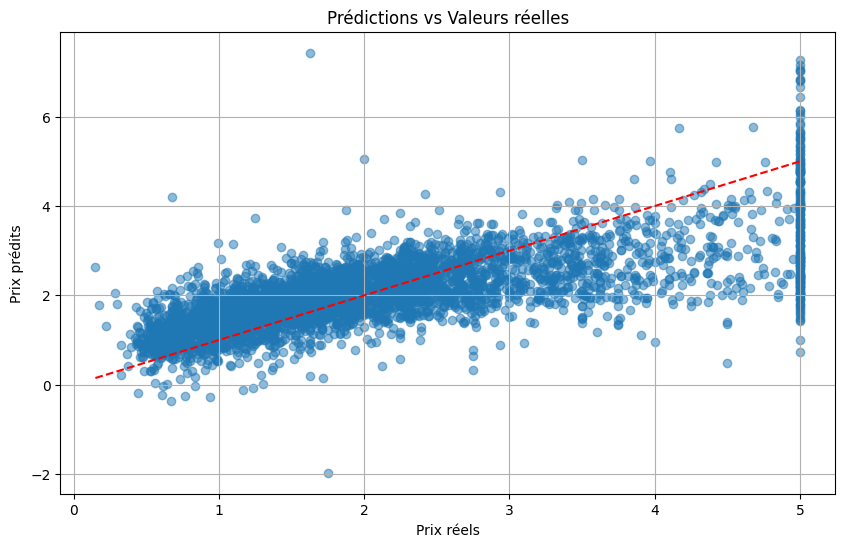

In [23]:
# Visualisation des prédictions vs valeurs réelles
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Prix réels')
plt.ylabel('Prix prédits')
plt.title('Prédictions vs Valeurs réelles')
plt.grid(True)
#plt.savefig('predictions_vs_reelles.png')
#plt.close()

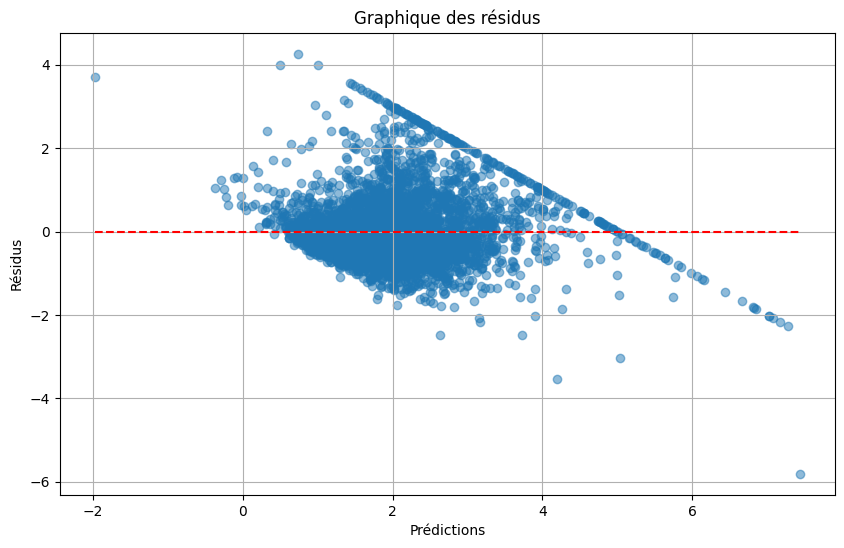

In [22]:
# Visualisation des résidus
plt.figure(figsize=(10, 6))
residus = y_test - y_pred
plt.scatter(y_pred, residus, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.title('Graphique des résidus')
plt.grid(True)
#plt.savefig('residus.png')
#plt.close()


Projet de régression linéaire terminé!


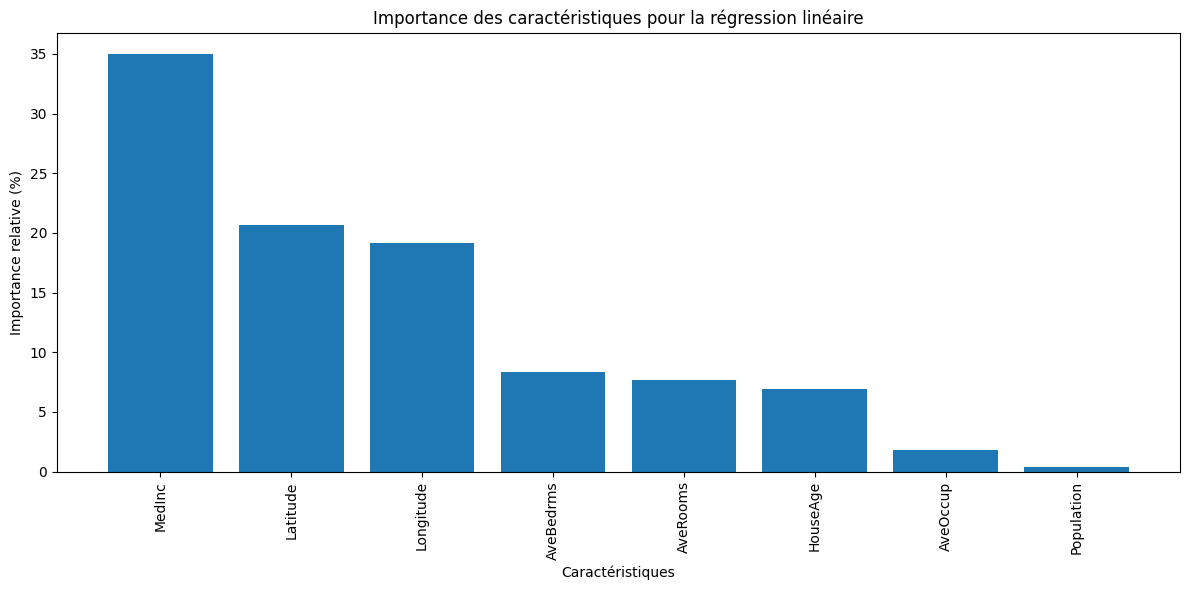

In [21]:
# Visualisation de l'importance des caractéristiques
plt.figure(figsize=(12, 6))
importance = np.abs(linear_model.coef_)
importance = 100 * importance / np.sum(importance)
indices = np.argsort(importance)[::-1]
features = np.array(housing.feature_names)[indices]
plt.bar(range(X.shape[1]), importance[indices])
plt.xticks(range(X.shape[1]), features, rotation=90)
plt.xlabel('Caractéristiques')
plt.ylabel('Importance relative (%)')
plt.title('Importance des caractéristiques pour la régression linéaire')
plt.tight_layout()
#plt.savefig('importance_features.png')
#plt.close()

print("\nProjet de régression linéaire terminé!")
